### In this notebook we do a singular value decomposition of our feautures. It turns out that six components of the training data explain over 99% of the variance. However, our models do not perform well with so few features.

In [23]:
import librosa, librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy
import math
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split

In [24]:
#Import the data file containing all features and classifications
df = pd.read_csv('MLNS_05292024.csv')

/var/folders/5z/7fkzpcz93gz6mqgh9vjgfymm0000gn/T/ipykernel_33804/3632915630.py:2: DtypeWarning: Columns (25,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('MLNS_05292024.csv')


In [25]:
#Store a series in Y which contains the classification label 'fam_or_subfam'
y=df['fam_or_subfam']

In [26]:
#Create a test-train split and train-validation split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=17, test_size=.2, stratify=y)
X_tt, X_val, y_tt, y_val = train_test_split(X_train, y_train, test_size=.2, stratify=y_train)

Text(0, 0.5, ' sum of explained ratio')

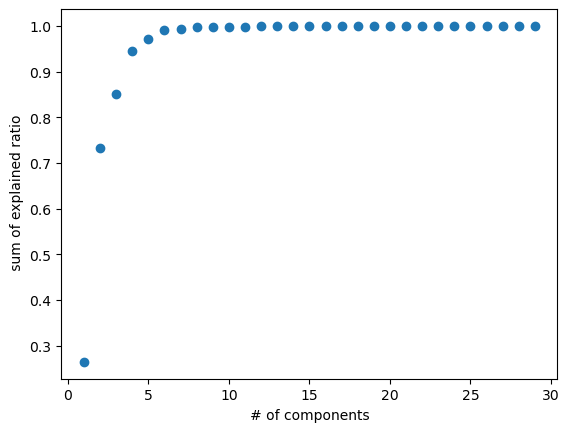

In [27]:
#Six components of the features explain over 99% of the variance.
explained_ratio = []
component_list = []
for n in range(1,30,1):
    component_list.append(n)
    svd = TruncatedSVD(n_components=n, n_iter=7, random_state=42)
    svd.fit(X_train)
    explained_ratio.append(svd.explained_variance_ratio_.sum())
plt.scatter(component_list,explained_ratio)    
plt.xlabel('# of components')
plt.ylabel(' sum of explained ratio')